In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

In [2]:
dataframe = pd.read_csv("compas-scores-two-years.csv")

In [3]:
dataframe_temp = pd.read_csv("compas-scores-two-years.csv")

In [4]:
dataframe2 = pd.DataFrame(dataframe,
                          columns=['age','race','juv_fel_count','decile_score','juv_misd_count','juv_other_count','priors_count','is_violent_recid','decile_score','v_decile_score','priors_count','start','end','event'])

In [5]:
mapping = {'African-American' : 0, 'Asian' : 1, 'Caucasian' : 2, 'Hispanic' : 3,'Native American' : 4, 'Other' : 5}
dataframe2 = dataframe2.replace({'race' : mapping})
dataframe_temp = dataframe_temp.replace({'race' : mapping})

In [6]:
Y_labels = dataframe.iloc[:,-1]

In [7]:
recid_status = dataframe['is_recid'].to_numpy()

In [8]:
data_train,data_test,labels_train,labels_test = train_test_split(dataframe2, Y_labels,test_size = 0.33,random_state = 42,shuffle=False)

In [9]:
data_train.shape

(4833, 14)

In [10]:
false_positives = []
af_am_fp = 0
ca_fp = 0
race_false_positives = [0,0,0,0,0,0]
for i in range (len(Y_labels)):
    if(Y_labels[i] == 0 and recid_status[i] == 1):
        race_false_positives[dataframe2['race'].iloc[i]] += 1
        false_positives.append(dataframe2['race'].iloc[i])
        if(dataframe2['race'].iloc[i] == 0):
            af_am_fp += 1
        if(dataframe2['race'].iloc[i] == 2):
            ca_fp += 1

In [11]:
len(false_positives)

220

In [12]:
if(len(false_positives) != 0):
    perc_af_am_fp = (af_am_fp / len(false_positives))*100

In [13]:
x = np.unique(dataframe['race'].to_numpy())
y = race_false_positives

Text(0.5, 1.0, 'False negative count for each race')

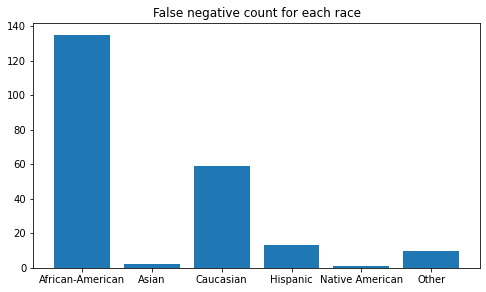

In [14]:
plt.rcParams["figure.figsize"] = (8,4.5)
plt.bar(x, y)
plt.title("False negative count for each race")

In [15]:
race_recidivism_count = [0,0,0,0,0,0]
race_norecidivism_count = [0,0,0,0,0,0]
for i in range (len(dataframe_temp['race'])):
    if(dataframe_temp.iloc[i,-1] == 0):
        race_norecidivism_count[dataframe_temp['race'].iloc[i]] += 1
    else:
        race_recidivism_count[dataframe_temp['race'].iloc[i]] += 1

In [16]:
race_norecidivism_count

[1795, 23, 1488, 405, 8, 244]

In [17]:
race_recidivism_count

[1901, 9, 966, 232, 10, 133]

In [18]:
# plt.rcParams["figure.figsize"] = (8,5.5)
# plt.bar(x,race_norecidivism_count,color = 'green',label = 'people not recidivated')
# plt.bar(x,race_recidivism_count,color = 'red',label = 'people recidivated')
# plt.legend(['race_norecidivism_count','race_recidivism_count'])
# plt.title("Recidivated vs Not Recidivated for each race")

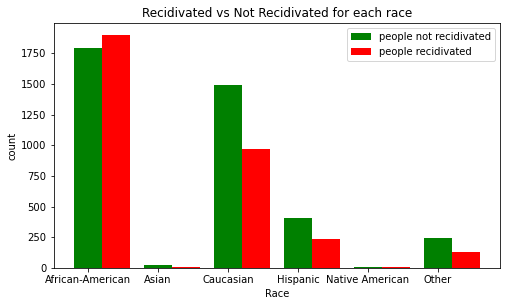

In [19]:
w = 0.4
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,race_norecidivism_count,w,color = 'green',label = 'people not recidivated')
plt.bar(bar2,race_recidivism_count,w,color = 'red',label = 'people recidivated')
plt.title("Recidivated vs Not Recidivated for each race")
plt.xlabel('Race')
plt.ylabel('count')
plt.xticks(bar1,x)
plt.legend()


In [20]:
x_afam = dataframe_temp.loc[dataframe_temp['race'] == 0,'decile_score'].values
x_asian = dataframe_temp.loc[dataframe_temp['race'] == 1,'decile_score'].values
x_cau = dataframe_temp.loc[dataframe_temp['race'] == 2,'decile_score'].values
x_his = dataframe_temp.loc[dataframe_temp['race'] == 3,'decile_score'].values
x_nat = dataframe_temp.loc[dataframe_temp['race'] == 4,'decile_score'].values
x_oth = dataframe_temp.loc[dataframe_temp['race'] == 5,'decile_score'].values

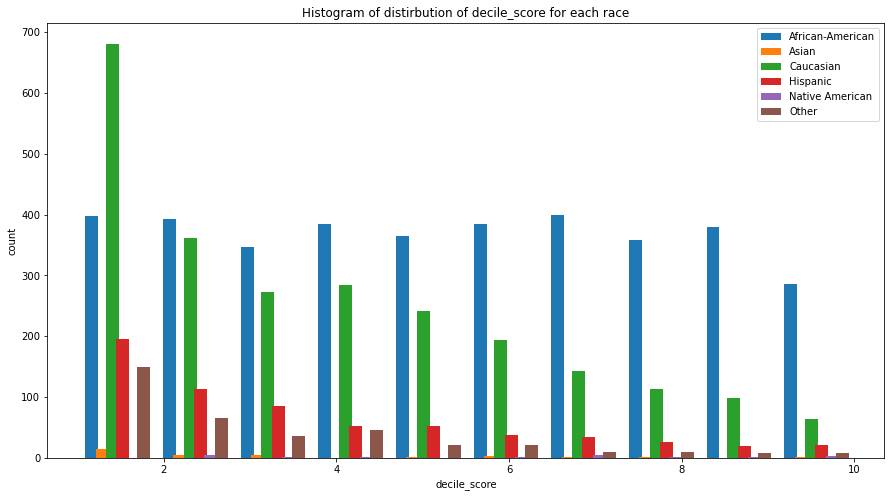

In [21]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist([x_afam,x_asian,x_cau,x_his,x_nat,x_oth],width = 0.15)
plt.title("Histogram of distirbution of decile_score for each race")
plt.xlabel('decile_score')
plt.ylabel('count')
plt.legend(['African-American','Asian','Caucasian','Hispanic','Native American','Other'])

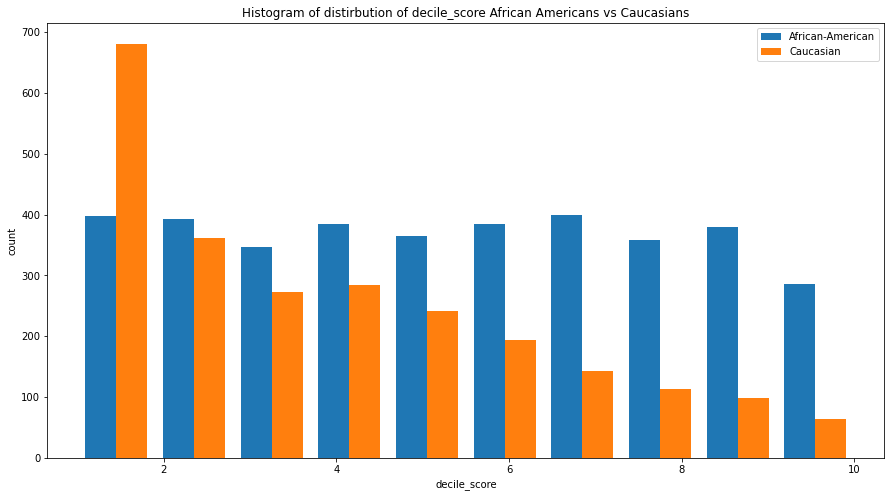

In [22]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist([x_afam,x_cau])
plt.title("Histogram of distirbution of decile_score African Americans vs Caucasians")
plt.xlabel('decile_score')
plt.ylabel('count')
plt.legend(['African-American','Caucasian'])

In [23]:
decile_afam = [0,0,0,0,0,0,0,0,0,0]
for i in range(len(dataframe_temp['race'])):
    if (dataframe_temp['race'].iloc[i] == 0):
        decile_afam[dataframe_temp['decile_score'].iloc[i] - 1] += 1

In [24]:
Y_labels.shape

(7214,)

In [25]:
lr = LogisticRegression()
lr.fit(data_train,labels_train)

/Users/harivigneshgomathi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
pred = lr.predict(data_test)

In [27]:
labels_test_arr = labels_test.values

In [28]:
count = 0
for i in range (len(pred)):
    if(pred[i] == labels_test_arr[i]):
        count+=1

avg = (count/len(pred))*100
print("Accuracy: ",avg)

Accuracy:  93.57412851742966
